## Project 1: HR Analytics (needs to be optimized!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee = pd.read_csv\
("P90-S2-Human-Resources-Data/1. Human Resources Data/Human_Resources.csv")
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Visualizations

Let's replace 'Attrition', 'OverTime' and 'Over18' with integers before any visualizations.

In [3]:
employee.Attrition = np.where(employee.Attrition=='Yes',1,0) # faster than apply
employee.Over18 = np.where(employee.Over18=='Y',1,0)
employee.OverTime = np.where(employee.OverTime=='Yes',1,0)
# employee.OverTime = employee.OverTime.apply(lambda x:1 if x=='Yes' else 0)

Check for any missing values.

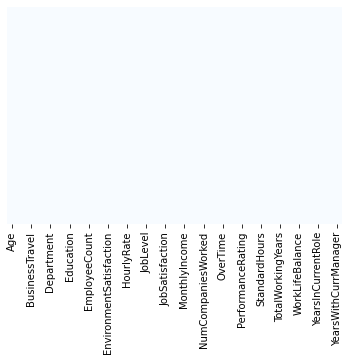

In [4]:
sns.heatmap(employee.isnull(), yticklabels=False, cbar=False, cmap='Blues');

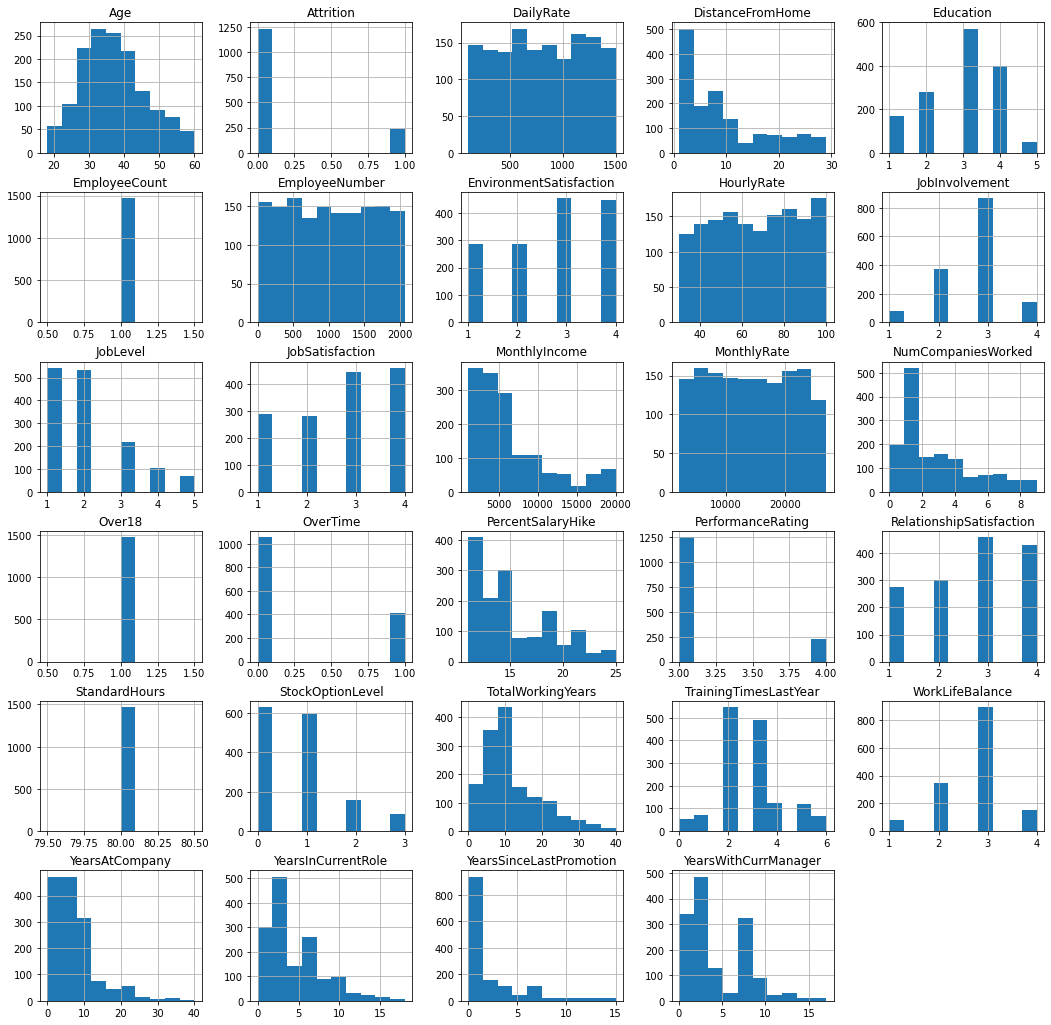

In [5]:
employee.hist(figsize=(18,18));

Drop 'EmployeeCount', 'StandardHours', 'Over18' since they do not change. 'EmployeeNumber' may also be dropped.

In [6]:
employee.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'],
             inplace=True)

Segment the dataframe into employees left and stayed. 
How many employees left and how many stayed in the company?

In [7]:
left_df = employee[employee.Attrition==1]
stayed_df = employee[employee.Attrition==0]
print("Left: {} ({:.2f}%), Stayed: {} ({:.2f}%)".format(len(left_df),
                                                       len(left_df)/len(employee)*100.0,
                                                       len(stayed_df),
                                                       len(stayed_df)/len(employee)*100.0))

Left: 237 (16.12%), Stayed: 1233 (83.88%)


Looking at the two new datasets we notice the following points right a way:
1. 'Age': Average age of the employees who left the company is lower than who stayed.
2. 'DailyRate': Rate of employees who stayed is higher.
3. 'DistanceFromHome': Employees who stayed live closer to the workplace.
4. 'EnvironmentSatisfaction' & 'JonSatisfaction' : Employees who stayed are generally more satisfied.
And many more that will be clear after illustrating the correlations.
    

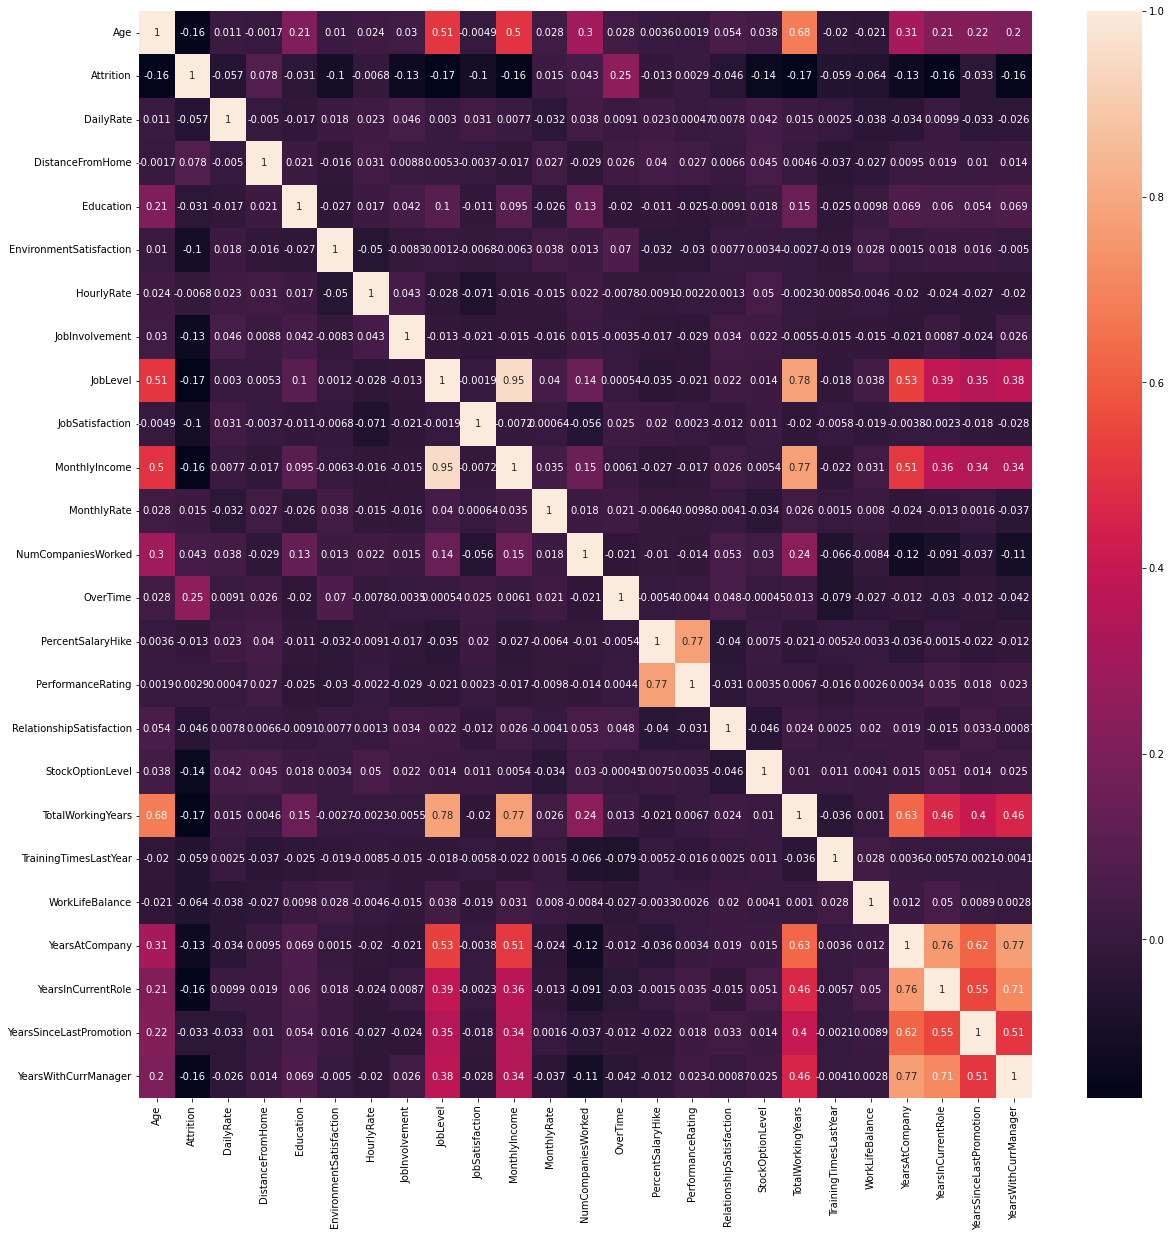

In [8]:
# Check correlations between different attributes of the data
correlations = employee.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

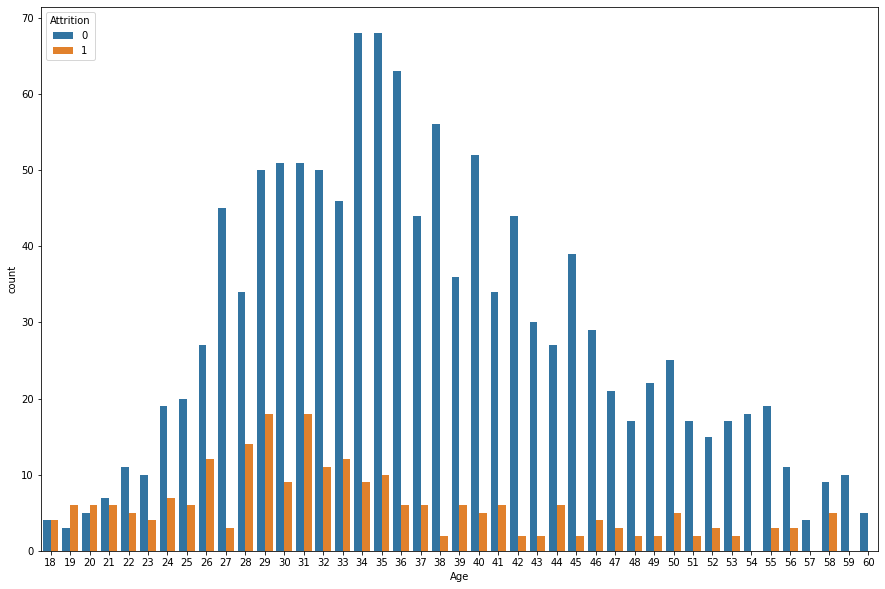

In [9]:
# To compare employee trunover w.r.t. 'Age'
plt.figure(figsize=(15,10))
sns.countplot(x='Age',hue='Attrition',data=employee);

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

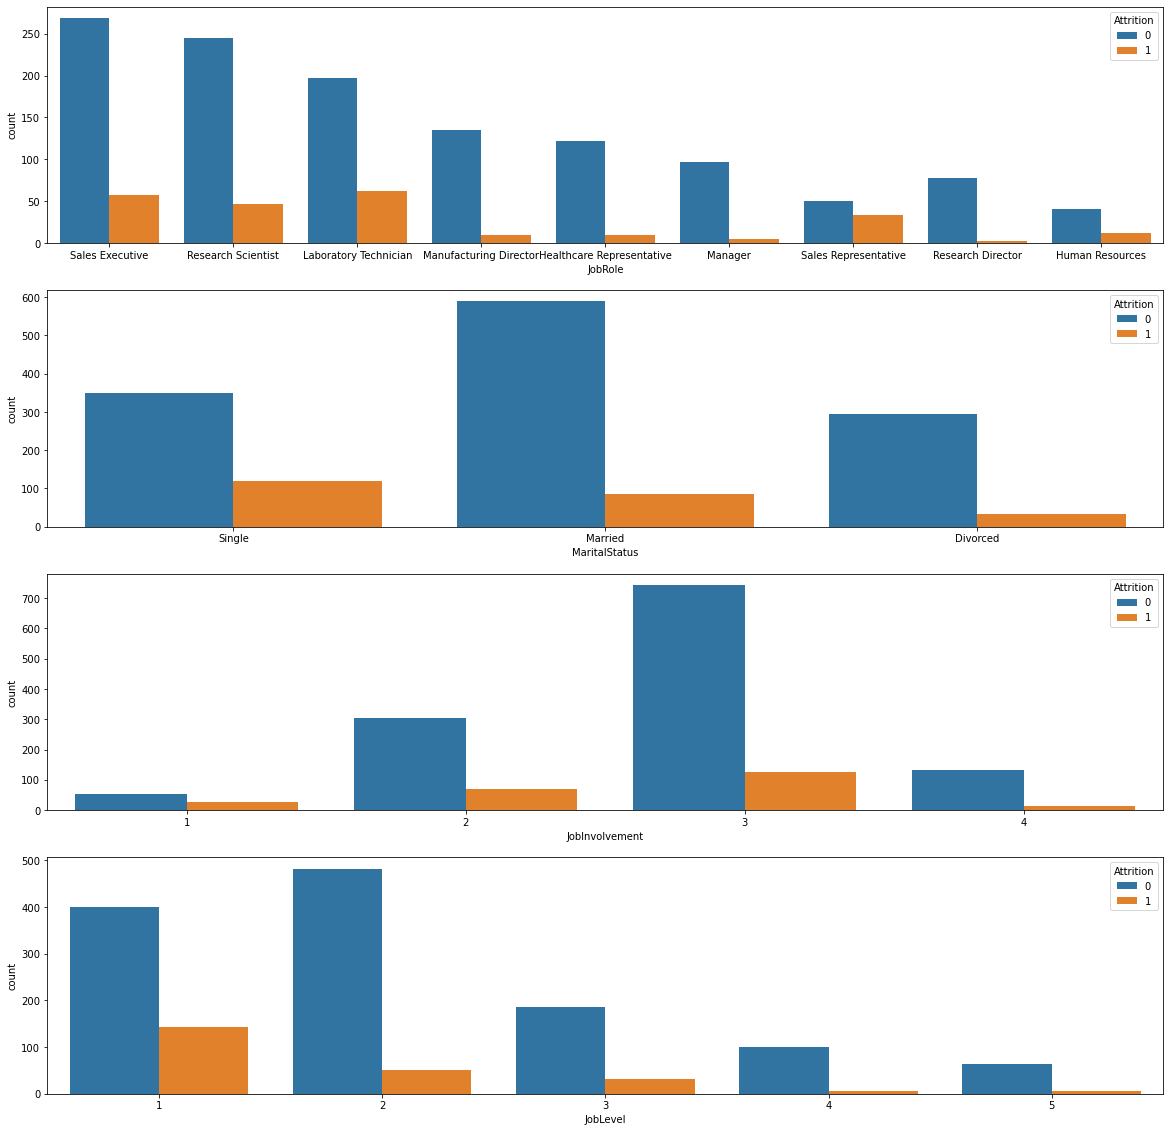

In [10]:
# To compare employee trunover w.r.t. 'JobRole', 'MaritalStatus', 'JobInvolvement' and 
# 'JObLevel'
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee)

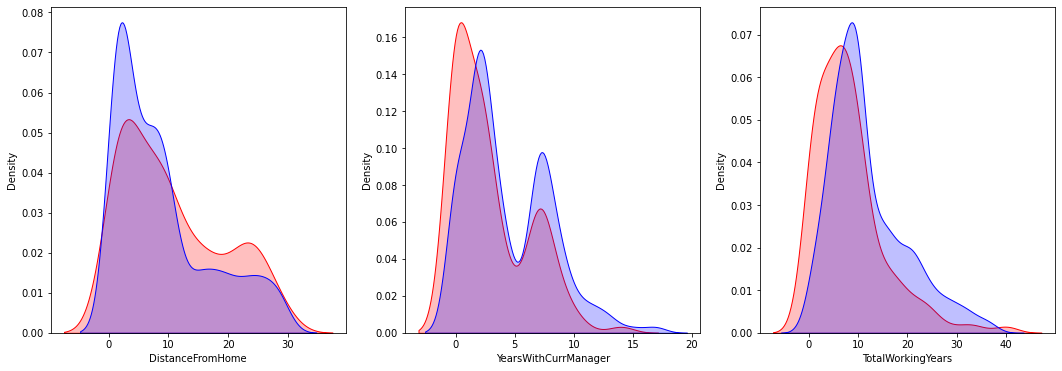

In [11]:
# Check the tendency of leaving using kde plots for 'DistanceFromHome', 
# 'YearsWithCurrManager' and 'TotalWorkingYears'
plt.figure(figsize=(18,6))
plt.subplot(131)
sns.kdeplot(x=left_df.DistanceFromHome,label='Employees left',shade=True, color='r')
sns.kdeplot(x=stayed_df.DistanceFromHome,label='Employees stayed',shade=True, color='b')
plt.subplot(132)
sns.kdeplot(x=left_df.YearsWithCurrManager,label='Employees left',shade=True, color='r')
sns.kdeplot(x=stayed_df.YearsWithCurrManager,label='Employees stayed',shade=True, color='b')
plt.subplot(133)
sns.kdeplot(x=left_df.TotalWorkingYears,label='Employees left',shade=True, color='r')
sns.kdeplot(x=stayed_df.TotalWorkingYears,label='Employees stayed',shade=True, color='b');

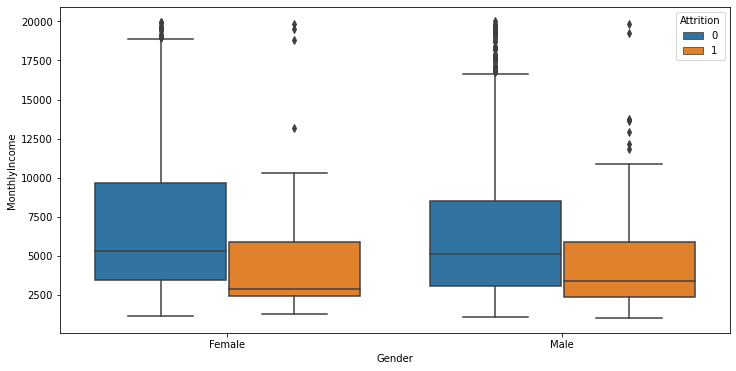

In [12]:
# Gender vs MonthlyIncome
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='MonthlyIncome',data=employee,hue='Attrition');

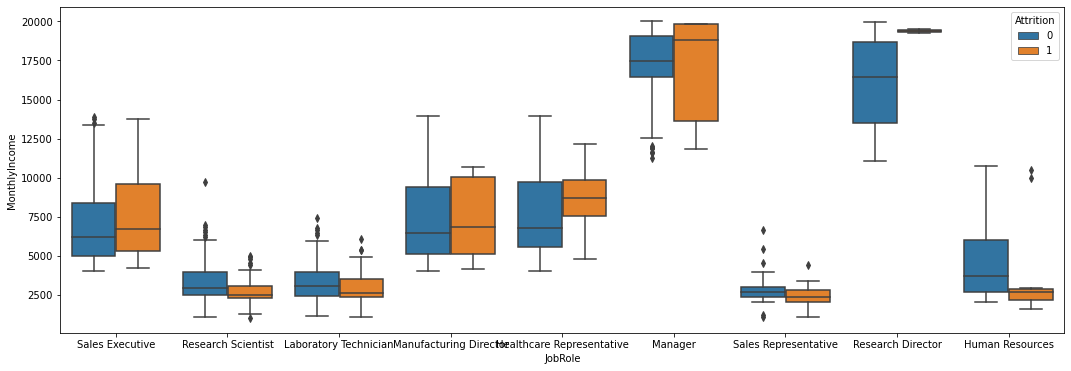

In [13]:
# JobRole vs MonthlyIncome
plt.figure(figsize=(18,6))
sns.boxplot(x='JobRole',y='MonthlyIncome',data=employee, hue='Attrition');

In [14]:
# Segment dataframe to categorical and numerical and encode the categorical dataframe

cat_columns = [x for x in employee.columns if employee[x].dtype=='object']  #categorical cols
num_columns = employee.columns.difference(cat_columns)  #numerical cols

X_cat = employee[cat_columns]
X_num = employee[num_columns].drop(["Attrition"],axis=1)   # Attrition is our target value

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)

X_all = pd.concat([X_num, X_cat],axis=1)

In [15]:
# Scaling the features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

/home/ahmad/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/ahmad/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [16]:
# target value
y = employee.Attrition

In [17]:
# Train and Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Logestic Regression

Accuracy score, LR model: 86.41 % 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       302
           1       0.70      0.42      0.53        66

    accuracy                           0.86       368
   macro avg       0.79      0.69      0.72       368
weighted avg       0.85      0.86      0.85       368



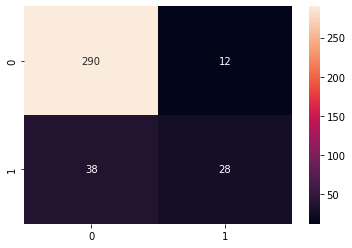

In [18]:
# Train logestic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Accuracy Score
print("Accuracy score, LR model: {:.2f} % \n".format(accuracy_score(y_test,y_pred)*100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Random Forest Classifier

Accuracy score, LR model: 85.05 % 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       302
           1       1.00      0.17      0.29        66

    accuracy                           0.85       368
   macro avg       0.92      0.58      0.60       368
weighted avg       0.87      0.85      0.80       368



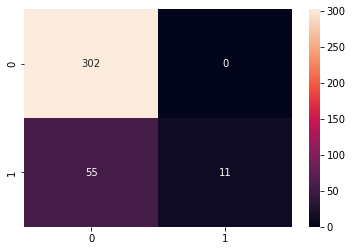

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# accuracy score
print("Accuracy score, LR model: {:.2f} % \n".format(accuracy_score(y_test,y_pred)*100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Artificial Neural Network

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

2022-02-13 10:15:15.662084: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-13 10:15:15.663296: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-13 10:15:15.664411: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

2022-02-13 10:15:29.444623: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-02-13 10:15:29.468767: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1094400000 Hz


Epoch 1/100
23/23 [==============================] - 3s 34ms/step - loss: 0.4802 - accuracy: 0.7725
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 0.3345 - accuracy: 0.8535
Epoch 3/100
23/23 [==============================] - 1s 35ms/step - loss: 0.3509 - accuracy: 0.8710
Epoch 4/100
23/23 [==============================] - 1s 32ms/step - loss: 0.2820 - accuracy: 0.9030
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 0.2855 - accuracy: 0.8829
Epoch 6/100
23/23 [==============================] - 1s 33ms/step - loss: 0.2420 - accuracy: 0.9217
Epoch 7/100
23/23 [==============================] - 1s 33ms/step - loss: 0.1849 - accuracy: 0.9389
Epoch 8/100
23/23 [==============================] - 1s 32ms/step - loss: 0.1384 - accuracy: 0.9523
Epoch 9/100
23/23 [==============================] - 1s 33ms/step - loss: 0.2170 - accuracy: 0.9140
Epoch 10/100
23/23 [==============================] - 1s 32ms/step - loss: 0.1477 - accuracy: 0.9407

23/23 [==============================] - 1s 29ms/step - loss: 7.1862e-06 - accuracy: 1.0000
Epoch 80/100
23/23 [==============================] - 1s 28ms/step - loss: 7.3416e-06 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 1s 29ms/step - loss: 7.0796e-06 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 1s 29ms/step - loss: 6.2395e-06 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 1s 28ms/step - loss: 5.9869e-06 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 1s 30ms/step - loss: 5.5756e-06 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 1s 29ms/step - loss: 6.8356e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 1s 30ms/step - loss: 6.5763e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 1s 29ms/step - loss: 5.3342e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 1s 29ms/step -

In [25]:
# y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

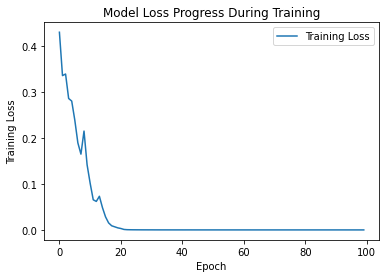

In [38]:
# plot the epochs history
plt.plot(epochs_hist.history['loss'],label='Training Loss')
plt.gca().set(title='Model Loss Progress During Training',
             xlabel='Epoch',
             ylabel='Training Loss')
plt.legend();

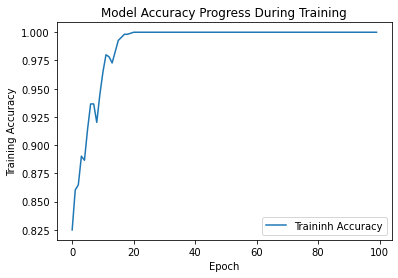

In [39]:
# plot the accuracy of training process
plt.plot(epochs_hist.history['accuracy'], label='Traininh Accuracy')
plt.gca().set(title='Model Accuracy Progress During Training',
             xlabel='Epoch',
             ylabel='Training Accuracy')
plt.legend();

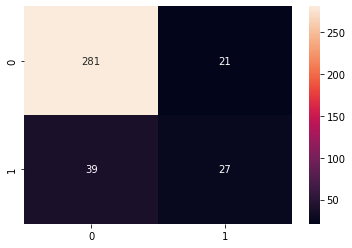

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       302
           1       0.56      0.41      0.47        66

    accuracy                           0.84       368
   macro avg       0.72      0.67      0.69       368
weighted avg       0.82      0.84      0.83       368



In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))